<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
</p></center>

<h1><center><font size=10>Student-Shubin Zhai's Homework</center></font></h1>
<h1><center>Personal Loan Homework: Week of Dec.30th 2024</center></h1>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [216]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0
%pip install pandas numpy seaborn
%pip install sqlalchemy-mate==2.0.0.0
%pip install uszipcode
%pip install geopandas
%pip install geodatasets
%pip install shapely
%pip install contextily



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

In [217]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)
from uszipcode import SearchEngine
import geopandas as gpd
import geodatasets as gds
from shapely.geometry import Point
from geopandas import GeoDataFrame
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [218]:
#load the loand data set into dataframe
loan_data = pd.read_csv('Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [219]:
#review the columns in the dataset and their data types
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [220]:
loan_data.shape

(5000, 14)

In [221]:
#check for missing values in the dataset.  None is found
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [222]:
#check for duplicate rows in the dataset.  None is found
loan_data.duplicated().sum()   

0

In [223]:
#reviewe the data set
loan_data.describe(include='all')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

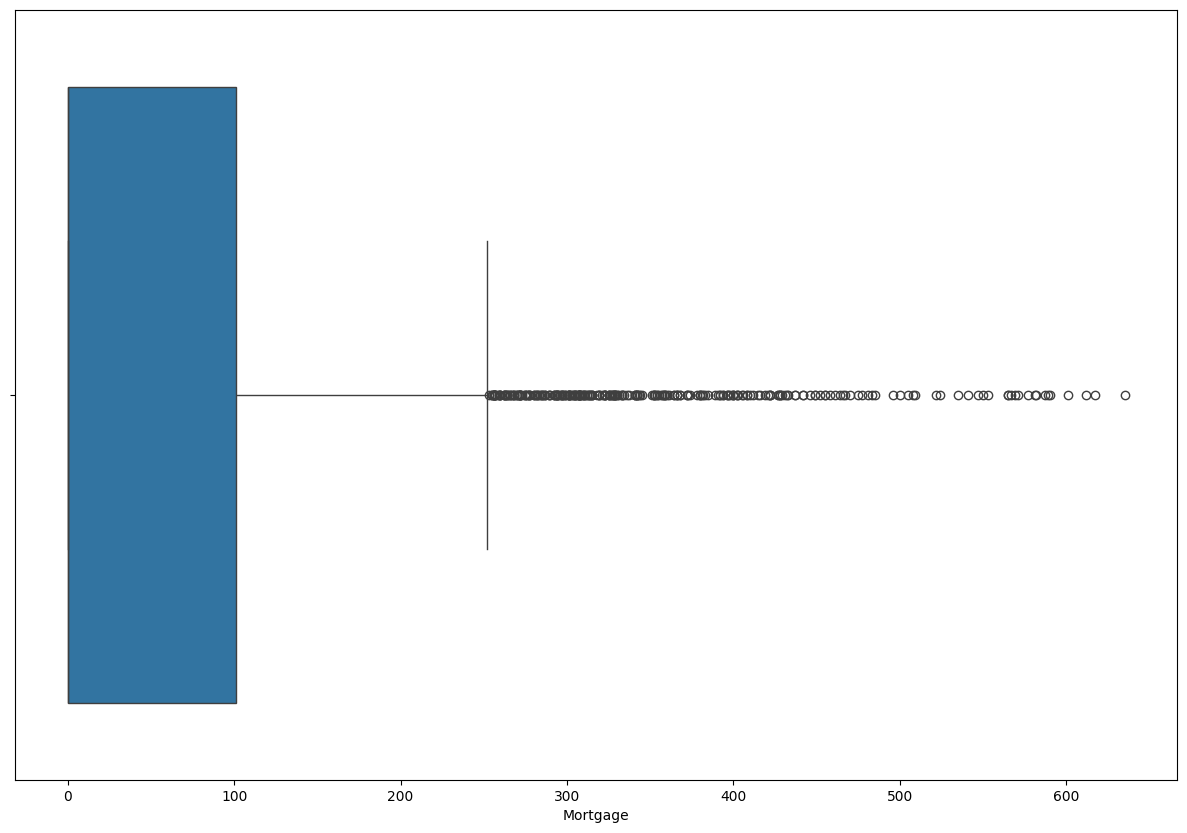

In [224]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=loan_data, x='Mortgage')
plt.show()

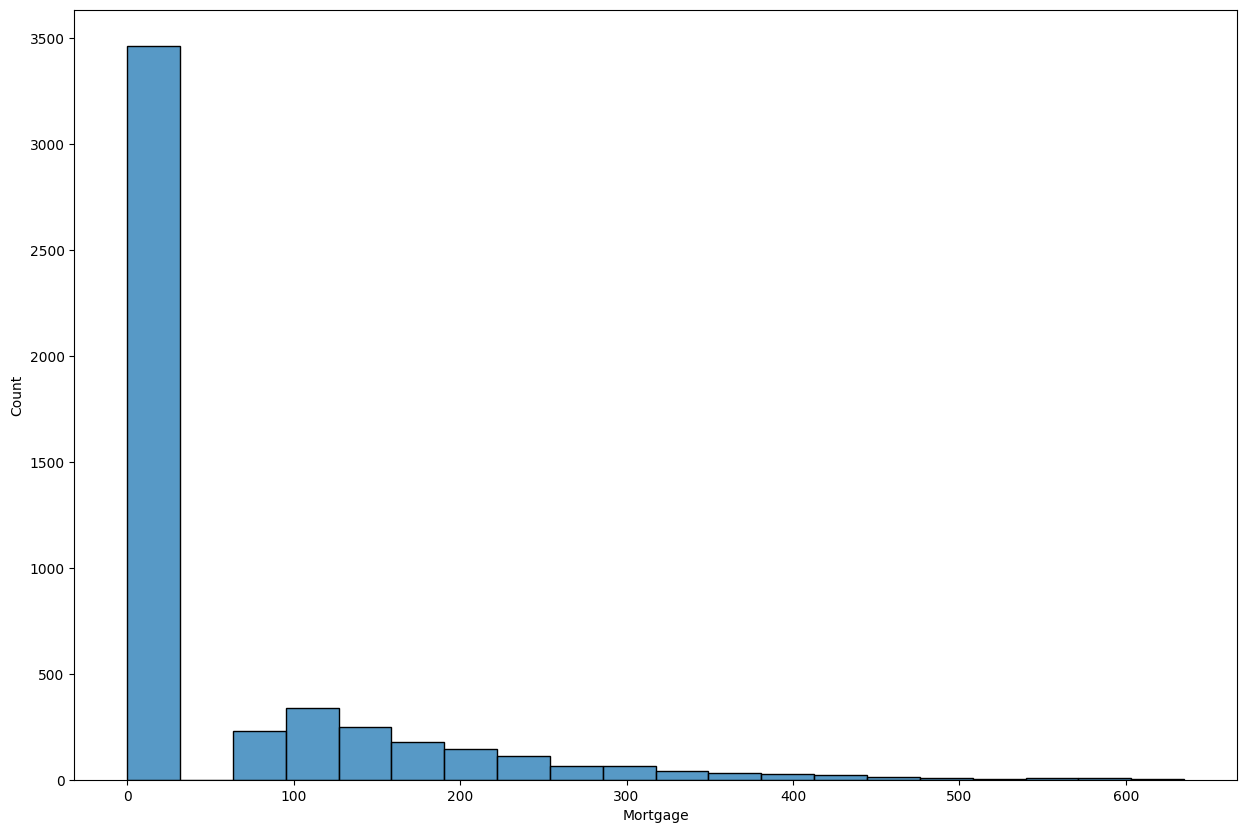

In [225]:
plt.figure(figsize=(15, 10))
sns.histplot(data=loan_data, x='Mortgage', bins=20)
plt.show()

Mortgage feature seems to have extreme value right skewed with long tail.  It also has extreme low with gap in the middle.
This data should be considered separately.

In [226]:
Q1 = loan_data['Mortgage'].quantile(0.25)
Q3 = loan_data['Mortgage'].quantile(0.75)
IQR = Q3 - Q1
outliers = loan_data[(loan_data['Mortgage'] < (Q1 - 1.5 * IQR)) | (loan_data['Mortgage'] > (Q3 + 1.5 * IQR))] 
total_outliers = len(outliers)
personal_loan_outliers_count = len(outliers[outliers['Personal_Loan']==1])
print(f'Total outliers in Mortgage: {total_outliers}')
print(f'Percent of outliers accepted personal loan from last campaign: {personal_loan_outliers_count/total_outliers*100:.2f}%')
m1= outliers['Mortgage'].mean()
print(f'Average mortage value: {m1:.2f}')


Total outliers in Mortgage: 291
Percent of outliers accepted personal loan from last campaign: 31.96%
Average mortage value: 355.66


## 2. How many customers have credit cards?

In [227]:
customer_using_non_bank_cc_count = len(loan_data[loan_data['CreditCard']==1])
cc_customer_CCAvg = len(loan_data[loan_data['CCAvg']>0])
print(f'Number of customers using other bank\'s credit card: {customer_using_non_bank_cc_count}')
print(f'Number of customers with credit card balance: {cc_customer_CCAvg}')

#if customer has a monthly credit card balance, then he/she has a credit card
print(f'Total number of customers have credit card: {cc_customer_CCAvg}')

Number of customers using other bank's credit card: 1470
Number of customers with credit card balance: 4894
Total number of customers have credit card: 4894


## 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [228]:
#Find out # of customer with personal loan count
personal_loan_count = len(loan_data[loan_data['Personal_Loan']==1])
personal_loan_count


480

<Axes: xlabel='Has_Loan', ylabel='count'>

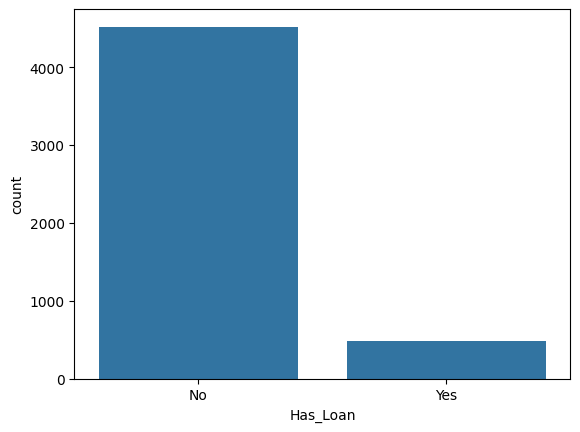

In [229]:
loan_data['Has_Loan']=loan_data['Personal_Loan'].apply(lambda x: 'Yes' if x==1 else 'No')
# plotting the count plot
sns.countplot(data=loan_data, x='Has_Loan')

In [230]:
#find features with numerical values
numerical_features = loan_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

<Axes: >

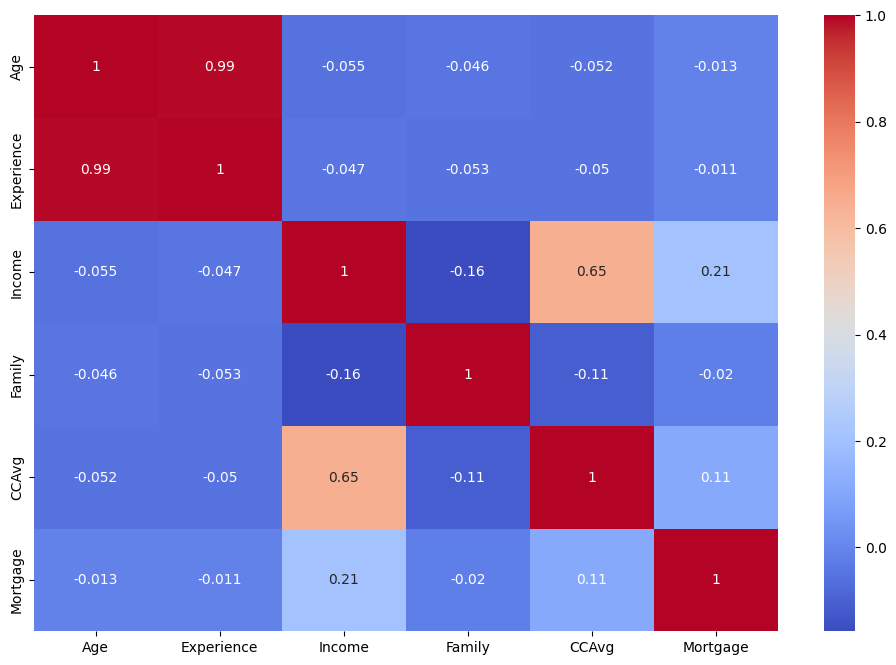

In [231]:
#Find out features with strong correlation and eliminate overlapping features
plt.figure(figsize=(12, 8))
selected_features = loan_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]

sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')

Age and Experience are strongly correlated.  we will exclude the Experience from feature selection

In [315]:
#total number of customers who accepted personal loan
total_customers = len(loan_data[loan_data['Personal_Loan']==1])
total_customers

480

<Figure size 1200x800 with 0 Axes>

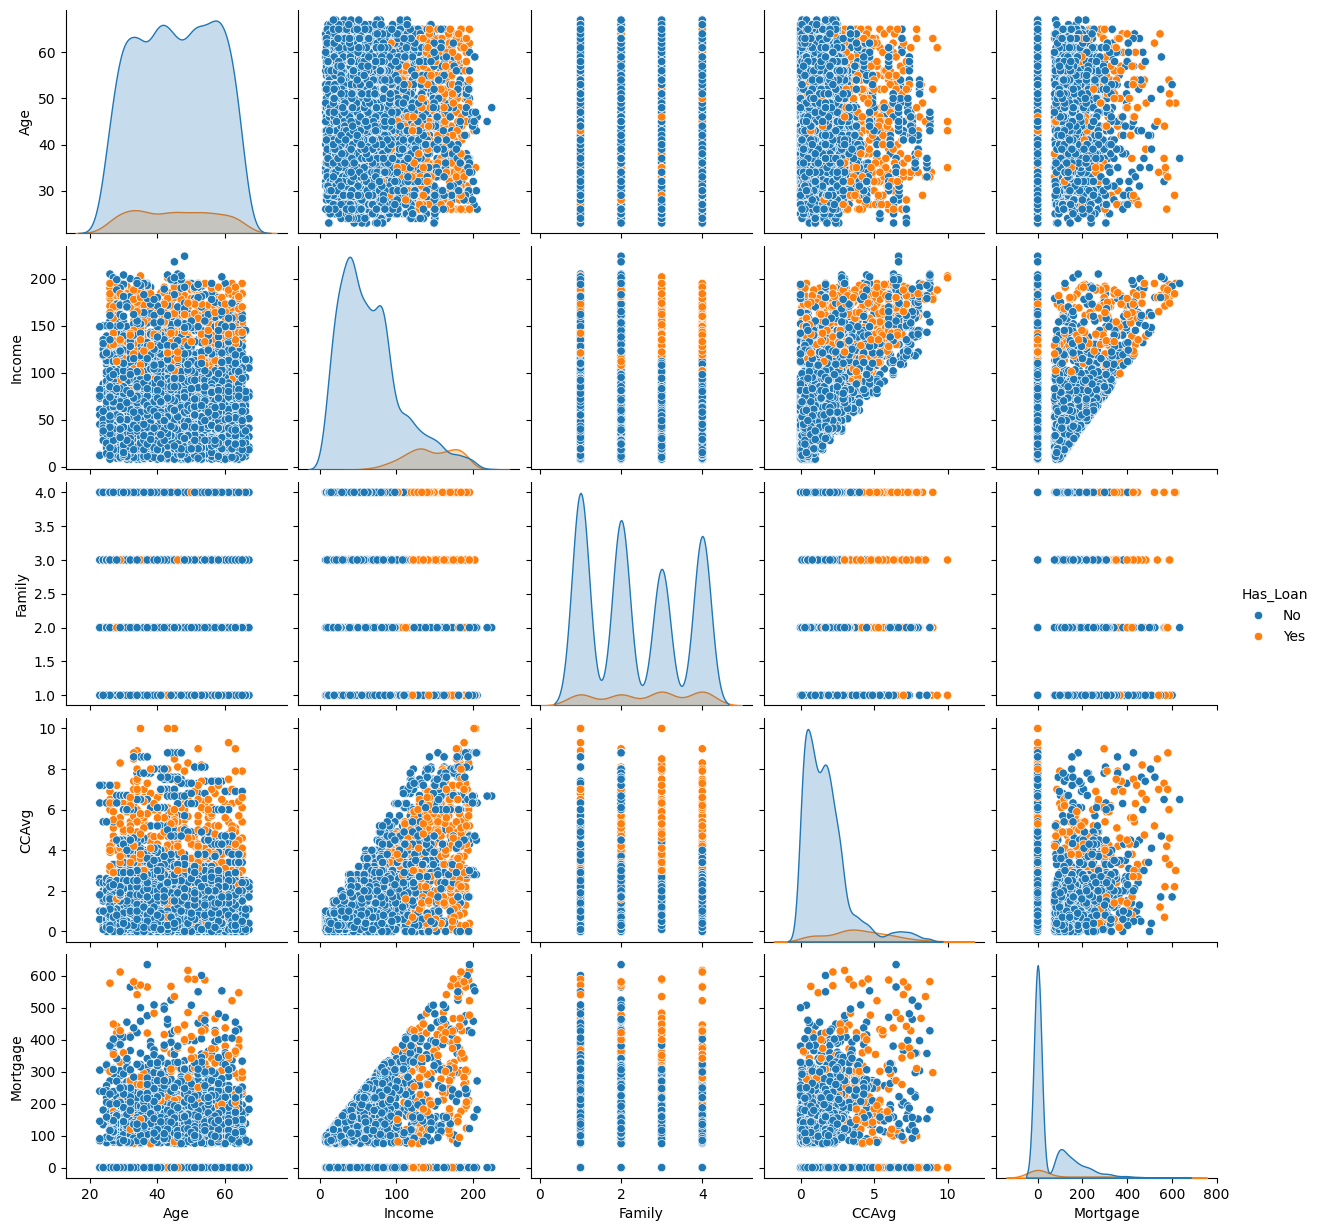

In [232]:
features = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage']
plt.figure(figsize=(12, 8))
sns.pairplot(loan_data, vars=features, hue='Has_Loan', diag_kind='kde')

## 4. How does a customer's interest in purchasing a loan vary with their age?

Instead of correlating to a specific age value, i.e. 38, it is better to create ranges of ages to reduce the posibility of overfitting or bias reulted from single value.

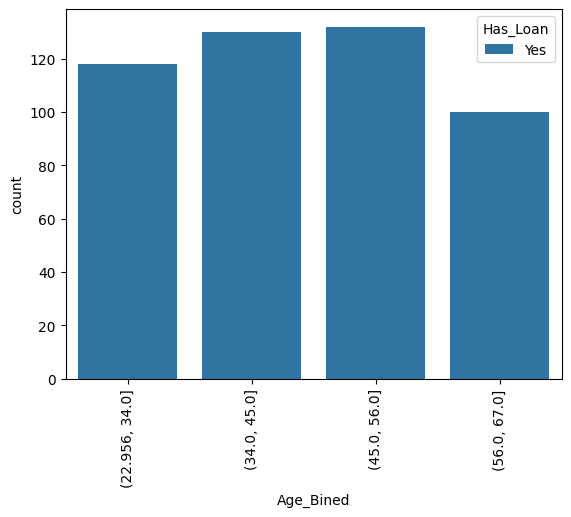

In [233]:

loan_data['Age_Bined'] = pd.cut(loan_data['Age'], bins=4)
loan_data['Age_Bined']

sns.countplot(data=loan_data[loan_data['Personal_Loan']==1], x='Age_Bined', hue='Has_Loan')
plt.xticks(rotation=90)
plt.show()


Starting at age of 22 which common associated with graudating from college, the personal loan needs increases with age through age of 56.  However after age of 56, the need for loan decreases.

## 5. How does a customer's interest in purchasing a loan vary with their education?

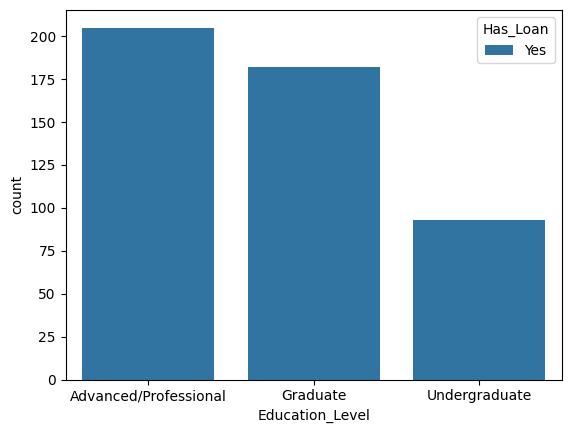

In [234]:
loan_data['Education_Level'] = loan_data['Education'].apply(lambda x: 'Undergraduate' if x==1 else 'Graduate' if x==2 else 'Advanced/Professional')
sns.countplot(data=loan_data[loan_data['Personal_Loan']==1], x='Education_Level', hue='Has_Loan')
plt.show()

From the chart, ti shows the higher the educdation the higher the chance of personal loan acceptance

## What is the relationship between features w/ continious values and Personal Loan using boxplot

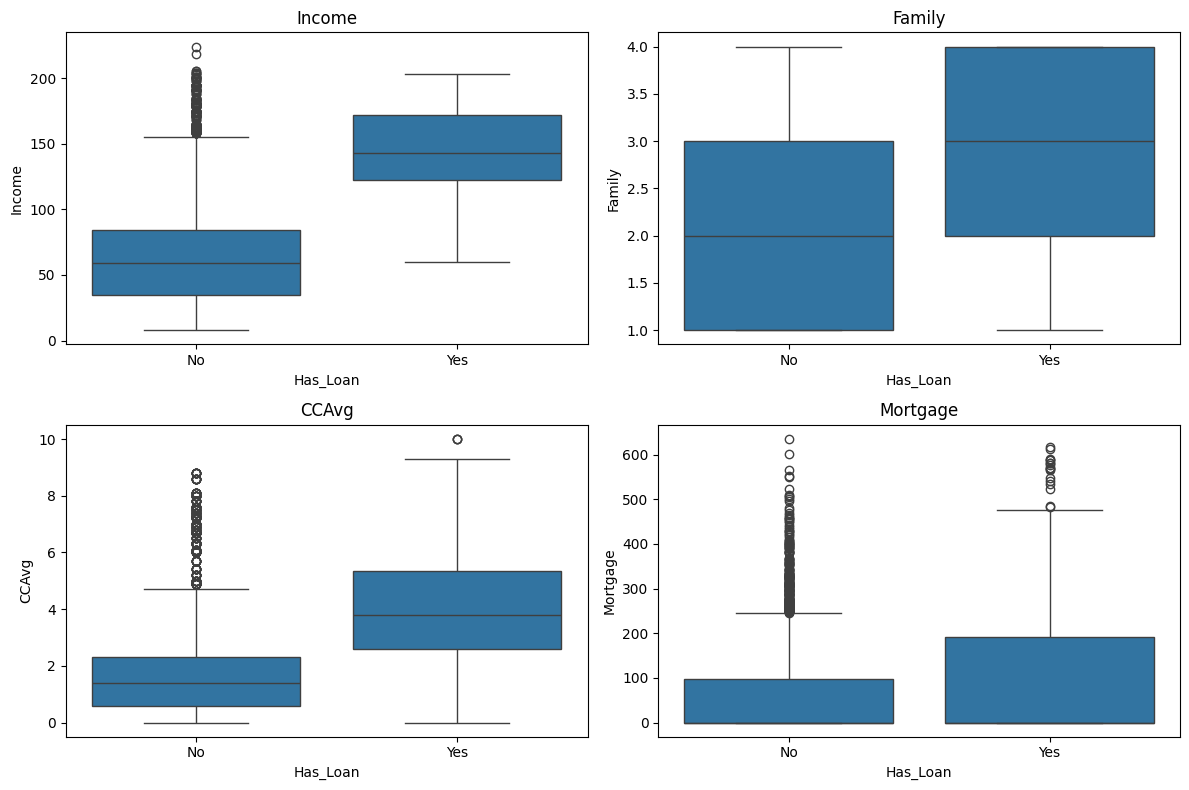

In [235]:

features_continious = ['Income', 'Family', 'CCAvg', 'Mortgage']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_continious):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=loan_data, x='Has_Loan', y=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

From the charts above, it looks like Income, CCAvg, Family do have predicable characteristics for personal loan acceptance


In [314]:
q1 = loan_data[loan_data["Personal_Loan"]==1]['CCAvg'].quantile(0.25)

q3= loan_data[loan_data["Personal_Loan"]==1]['CCAvg'].quantile(0.75)

print("People who accepted loan has the Q1 value for CCAvg at {} and Q3 value at {}".format(q1,q3))



People who accepted loan has the Q1 value for CCAvg at 2.6 and Q3 value at 5.3475


## Let's look at other Categorical values with personal loan acceptance 

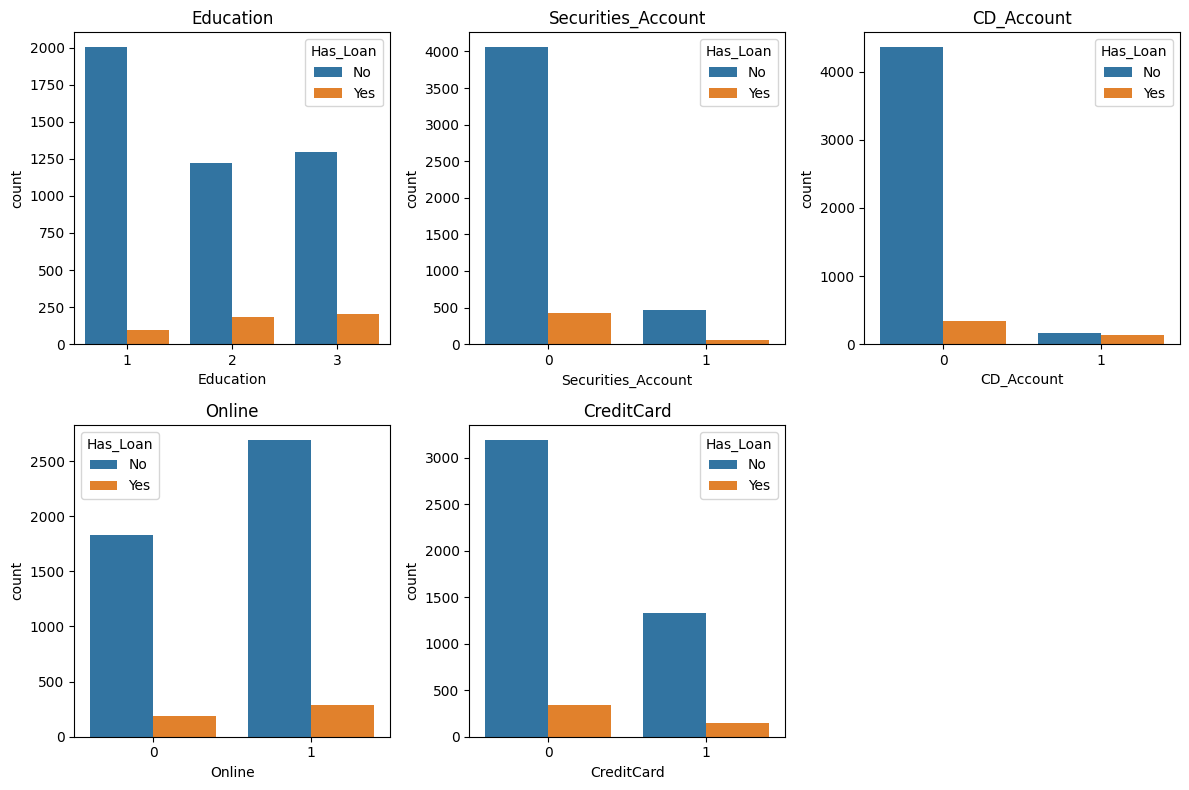

In [236]:
features_categorical = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']    
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_categorical):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=loan_data, x=feature, hue='Has_Loan')
    plt.title(feature)
plt.tight_layout()
plt.show()  

From above chart, it seems that people with CD Account appears to have higher # of chance of accepting Personal Loans.  Let's use cross tab to look a this more clearly with stack chart


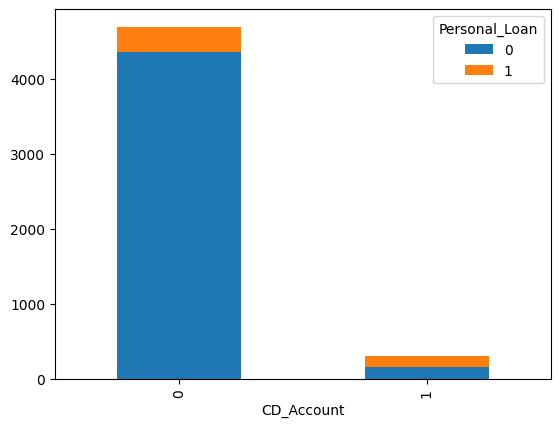

In [237]:
tab = pd.crosstab(loan_data['CD_Account'], loan_data['Personal_Loan'])
tab.plot(kind='bar', stacked=True)
plt.show()


In [238]:
#calculate the percentage of customers who has CD Account and accepted personal loan
print(f"Percentage of customers with CD Account accepted personal loan: {tab.loc[1, 1]/tab.loc[1].sum()*100:.2f}%")
#calculate the percentage of customers who doesn't have CD Account and rejected personal loan
print(f"Percentage of customers without CD Account rejected personal loan: {tab.loc[0, 1]/tab.loc[0].sum()*100:.2f}%")
#calculate the likelihood of customers with CD Account to accept personal loan vs customers without CD Account
print(f"Customers with CD Account to accept personal loan is {(tab.loc[1, 1]/tab.loc[1].sum()*100)/ (tab.loc[0, 1]/tab.loc[0].sum()*100):.2f} times likely to do so than customers without CD Account")


Percentage of customers with CD Account accepted personal loan: 46.36%
Percentage of customers without CD Account rejected personal loan: 7.24%
Customers with CD Account to accept personal loan is 6.41 times likely to do so than customers without CD Account


From categorical features, it looks like people who has CD Accounts can have high predicatable values for accepting personal loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

There is no missing data, so no missing value prep is needed.

Among the outliers based on Mortage value with average of 356K, because of the percentage of Personal Loan conversion rate of 32%, we should not simply drop these outliers.  Another reason for consideration, in the real world setting, to analyze the total loan amount.  However to simplify the analysis, we will just cap the values between 0.05 to 0.95 percentile

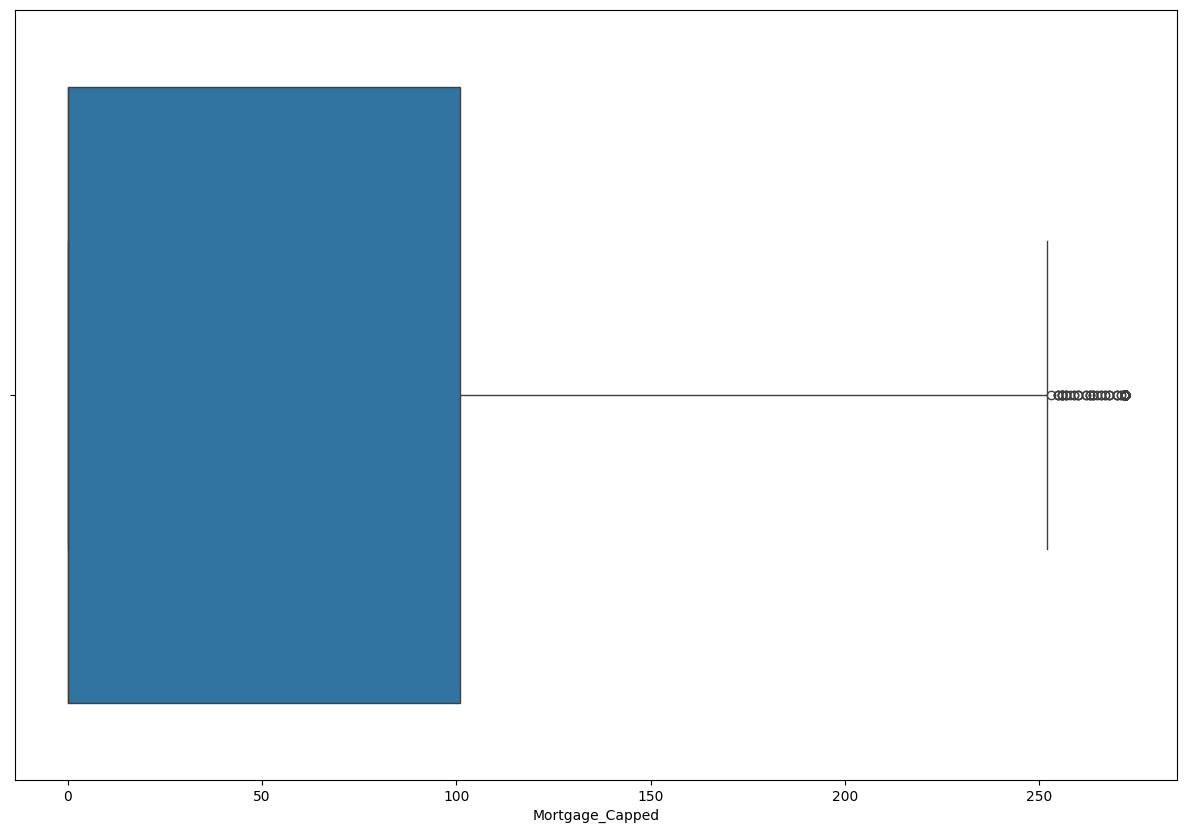

In [239]:
percent_hi = loan_data['Mortgage'].quantile(0.95)
percent_low = loan_data['Mortgage'].quantile(0.05)
loan_data['Mortgage_Capped'] = loan_data['Mortgage'].clip(lower=percent_low, upper=percent_hi)
plt.figure(figsize=(15, 10))
sns.boxplot(data=loan_data, x='Mortgage_Capped')
plt.show()

In [240]:
#create a new column to indicate if the customer has a credit card
loan_data['Has_CC'] = loan_data['CCAvg'].apply(lambda x: 1 if x>0 else 0)

Convert zip code to a geo location and see how the customers are clustered on a map

In [241]:

search = SearchEngine()

loan_data[loan_data['Personal_Loan']==1]['ZIPCode'].unique()

states=set([])
for zip in loan_data[loan_data['Personal_Loan']==1]['ZIPCode'].unique():
    zipcode_info = search.by_zipcode(zip)
    if zipcode_info is not None:
        states.add(str(zipcode_info.state))

states


{'CA'}

Looks like all of bank's customer is in California.  Let's add State/City, Lon/Lat, and population dencity to the loan data frame to be used for analysis with GeoPandas data

In [242]:
for zip in loan_data['ZIPCode'].unique():
    zipcode_info = search.by_zipcode(zip)
    if zipcode_info is not None:
        loan_data.loc[loan_data['ZIPCode']==zip, 'State'] = zipcode_info.state  
        loan_data.loc[loan_data['ZIPCode']==zip, 'City'] = zipcode_info.major_city 
        loan_data.loc[loan_data['ZIPCode']==zip, 'Latitude'] = zipcode_info.lat
        loan_data.loc[loan_data['ZIPCode']==zip, 'Longitude'] = zipcode_info.lng
        loan_data.loc[loan_data['ZIPCode']==zip, 'LongLat'] = str(zipcode_info.lng) + ',' + str(zipcode_info.lat)
        loan_data.loc[loan_data['ZIPCode']==zip, 'Population'] = zipcode_info.population
        

loan_data[['LongLat', 'Population']].head(5)

#There is some NaN value for population, we will fill it with the mean value
loan_data['Population'] = loan_data['Population'].fillna(loan_data['Population'].mean())

#Let's check to see if there is no missing values in the new dataset
loan_data.isnull().sum()




ID                     0
Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
Has_Loan               0
Age_Bined              0
Education_Level        0
Mortgage_Capped        0
Has_CC                 0
State                 34
City                  34
Latitude              34
Longitude             34
LongLat               34
Population             0
dtype: int64

There are some customer's zip code doesn't come up with valid geodata.  Because the # of missing record are small and these missing values and their corresponding features are not used for modeling.  We can ignore them.

Plot state of CA, filter the customer who took personal loans, and plot geo heatmap on the loand data

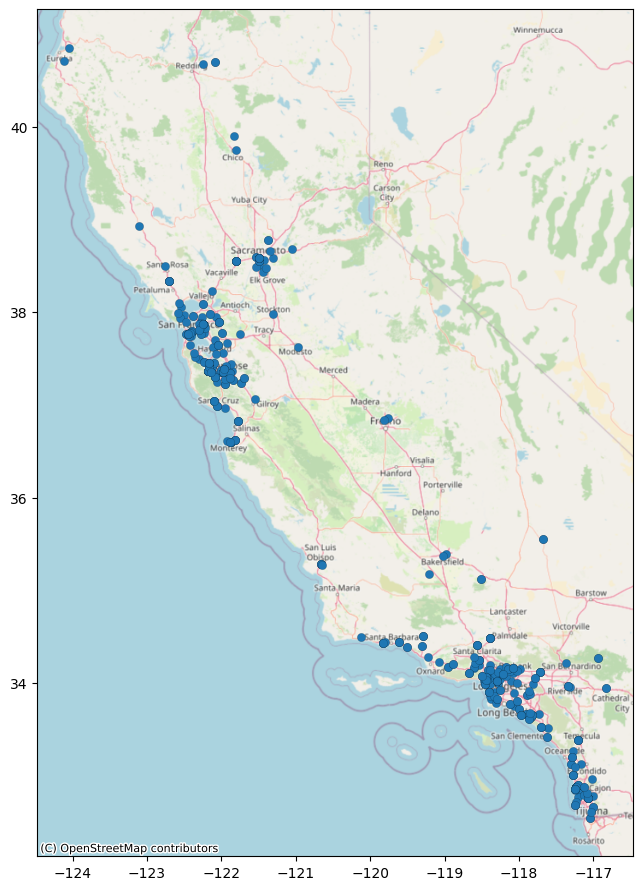

In [243]:
df = gpd.read_file('tl_2024_us_state.zip')
caMap = df[df['STUSPS']=='CA']

merged = caMap.merge(loan_data[loan_data['Personal_Loan']==1], left_on='STUSPS', right_on='State')
geometry = gpd.points_from_xy(merged['Longitude'], merged['Latitude'])  
merged.geometry= geometry

ca = ctx.Place("CA, USA", path="CA_USA.tif", zoom= 6, source=ctx.providers.OpenStreetMap.Mapnik)   
ax=merged.plot(figsize=(11, 11), edgecolor='black', linewidth=0.1)
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


Based on the mapping data, the personal loan acceptance are concentrated around major cities: San Francisco, LA, North LA long the coast, and San Diego.
So it maybe worth the effort to create a feature based on closness to metropolitan area.  Also the facts that most loans originated from coast areas could be an indication of association between income/property value and loan acceptance, assuming costal and metro areas are generally associated with higher income or property value or other factors (including population density for example)

In [244]:
loan_count_in_big_zipcode =len(loan_data[(loan_data['Population']>10000) & (loan_data['Personal_Loan']==1)])
total_loan_count_in_big_zipcode = len(loan_data[loan_data['Population']>10000])
total_loan_count = len(loan_data[loan_data['Personal_Loan']==1])
print(f'Percent of loans accepted in big cities: {loan_count_in_big_zipcode/total_loan_count_in_big_zipcode*100:.2f}%')
print(f'Percent of loans accepted in big zipcode of all loan accepted: {loan_count_in_big_zipcode/total_loan_count*100:.2f}%')


Percent of loans accepted in big cities: 9.58%
Percent of loans accepted in big zipcode of all loan accepted: 92.29%


Of all of the loan accpeted, 70% of them are in area with large population per zip code. This means we need to use population density as a feature. This is obviously consistent with geo heatmap results.  Population of the zipcode should be used as a feature.  In the previous steps, we have treated the missing population value with mean.

Let's prepare the data for model evalaution by settingthe X, y and training/test data split

In [245]:
trained_features = ['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education', 'CD_Account', 'Has_CC', 'Population']
X = loan_data[['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education', 'CD_Account', 'Has_CC', 'Population']]
y = loan_data['Personal_Loan']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [246]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [247]:


#following code is used to plot the confusion matrix based on the model and the predictors
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")


## Model Building

### Model Evaluation Criterion

Because this analysis is classification decision tree we will be using the following evaluation criteria:</br>
<ul>
<li>Accuracy: (TP + TN)/Total # of predications
<li>Precision: TP/(TP + FP)
<li>Recall: TP/(TP+FN)
<li>F1 Score:2*(Precision*Recall)/(Precision+Recall)
</ul>
We will pick the best Accuracy score and F1 Score.

To simplify our analysis, we will use the confusion matrix which we can use to see how the model converges.

### Model Building

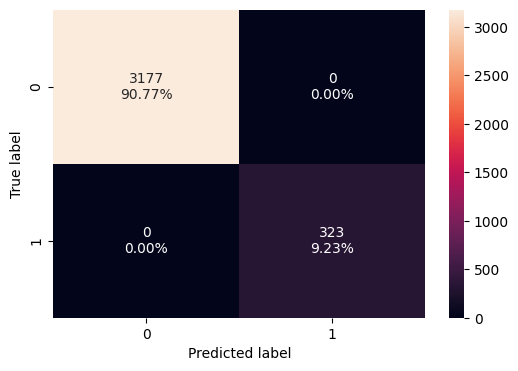

In [248]:
# Starting the model training with training data
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility
dtree1.fit(X_train, y_train)

#let's see how default model is performing
plot_confusion_matrix(dtree1, X_train, y_train)

Wow, the model is too perfect

In [249]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


This is too good to be true...let's look at the test data performance

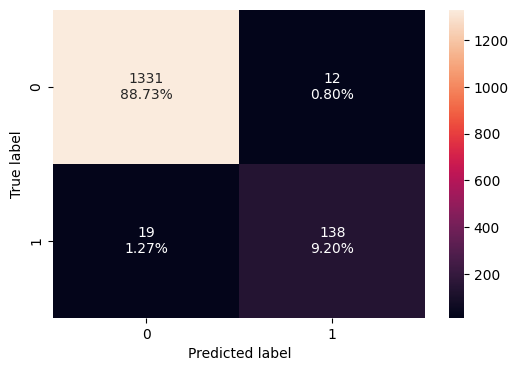

In [250]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [251]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.979333,0.878981,0.92,0.899023


Okay, we have overfitting as the F1 score differ too much with training F1 score.

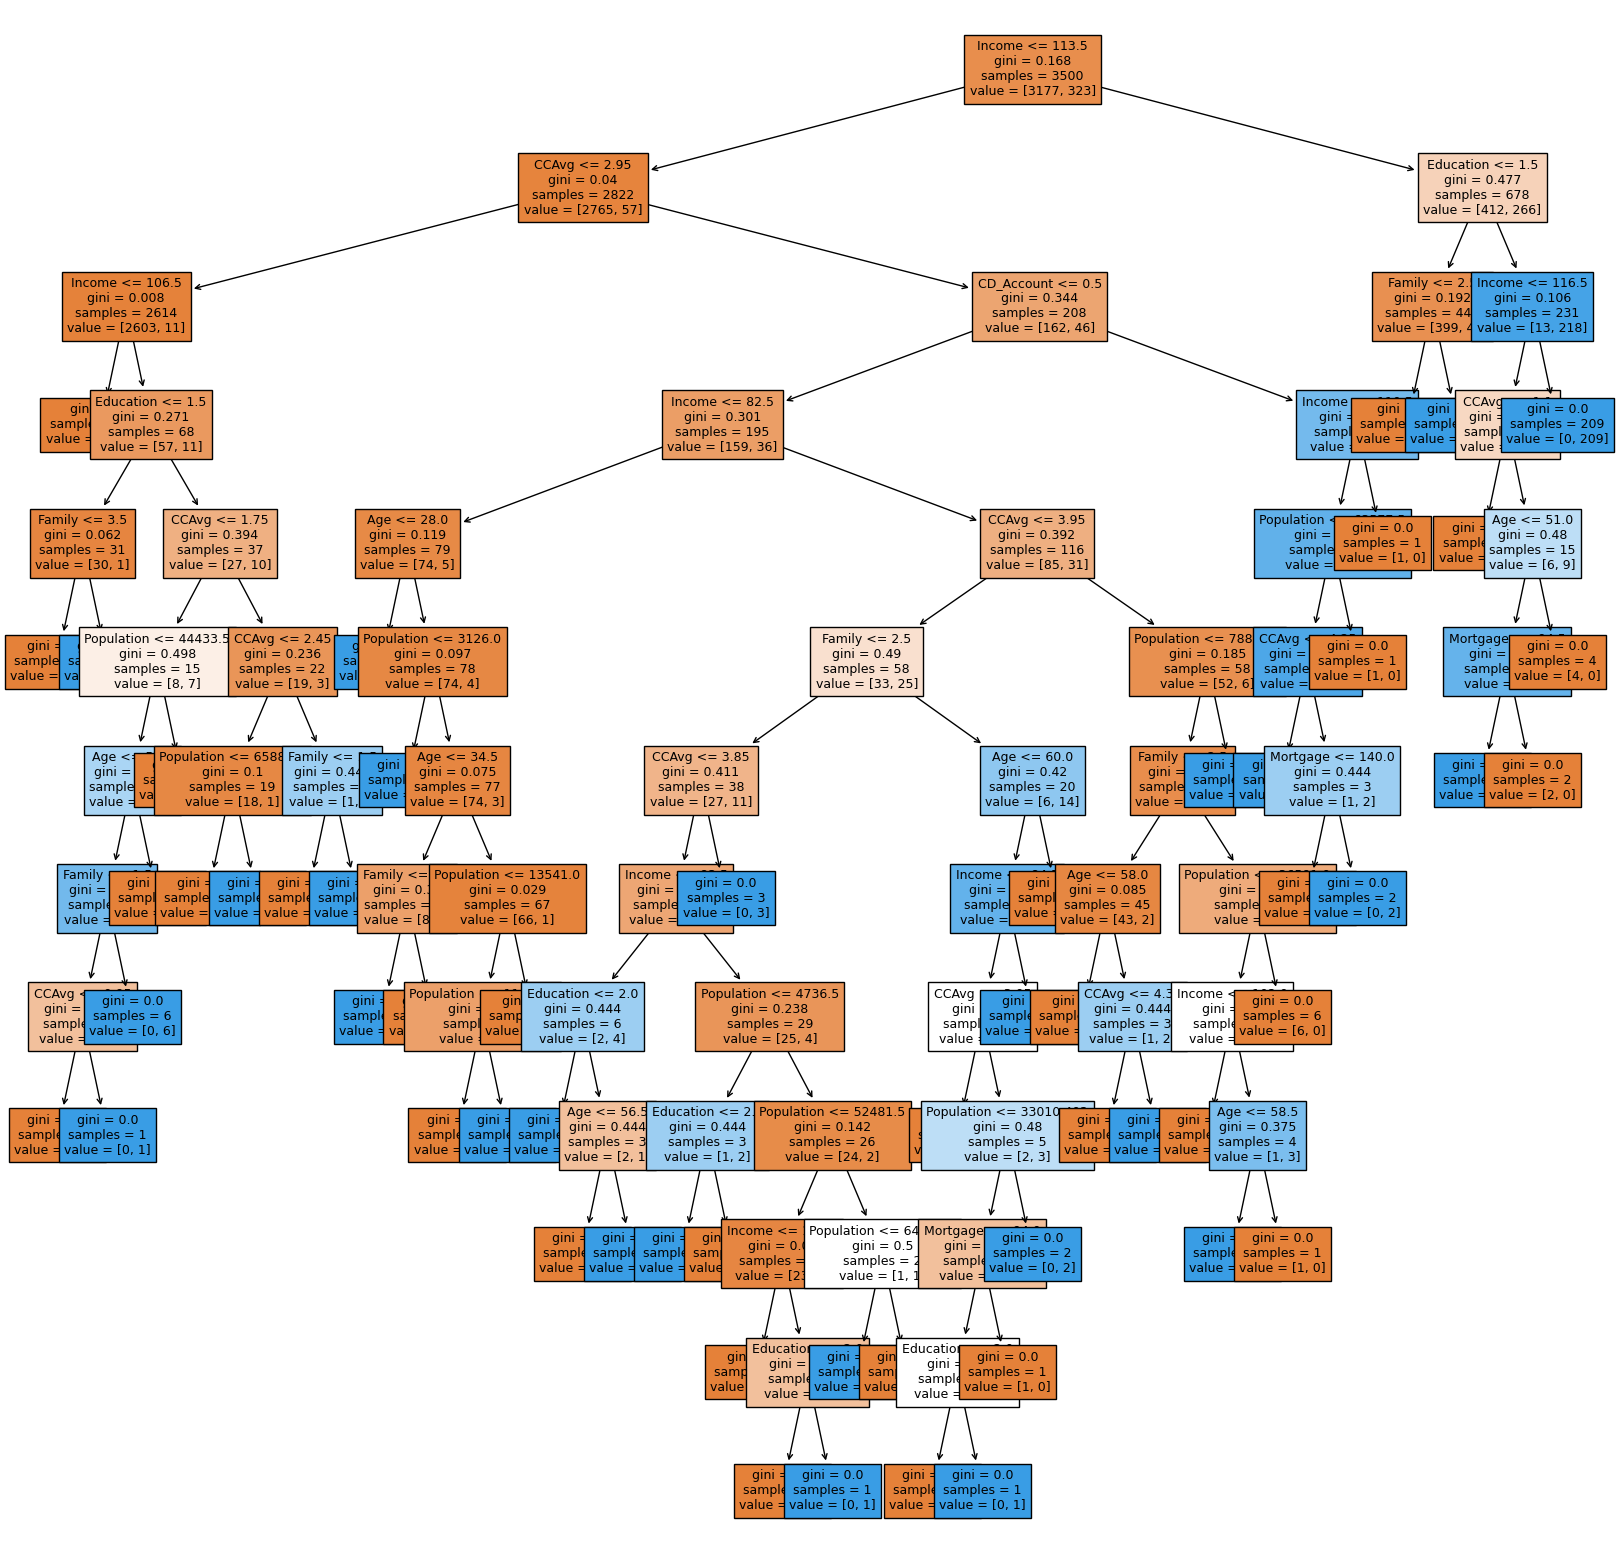

In [252]:
#Let's look a the tree visually and see how things are working
plt.figure(figsize=(20, 20))
tree.plot_tree(dtree1, feature_names=X.columns, 
    filled=True,
    fontsize=9,                     
    node_ids=False,                 # do not show the ID of each node
    class_names=None )
plt.show()


## Model Performance Improvement

### Let's do some pre-pruning to make the tree less complex to reduce the tree depth

In [253]:
#Let's try to tune the model to see if we can improve the performance
#Here we will be using the code provided from class to tune the model: Reference is UTAUSTIN Secion 2.17 Model Building - Decision Trees Pre-Pruning Hands-on
#ref: Hands_on_Decision_Tree.ipynb code base

# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator
                

In [254]:
# Let's see how the best model is performing
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)  

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=10,
                       random_state=42)

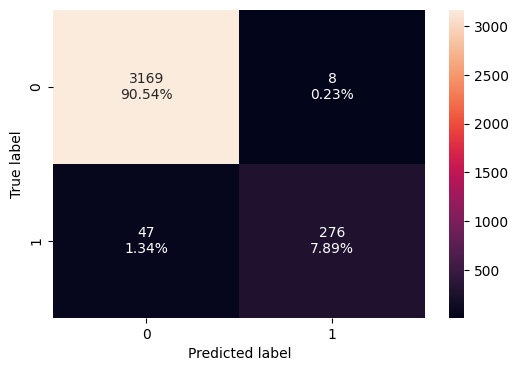

In [255]:
plot_confusion_matrix(dtree2, X_train, y_train)

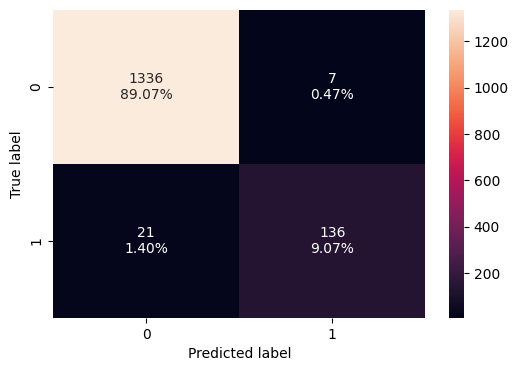

In [256]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [257]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.984286,0.854489,0.971831,0.90939


In [258]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.981333,0.866242,0.951049,0.906667


This model is much better because the F1 scores between training and test are much closer.  However, the test score is slightly worse than training score. 

### Let's perform Post Pruning Model improvement by computing the cost function to find model with the lowest alpha with lowest impurity</br>


alpha = [error(pruned)-error(original)]/# of nodes pruned

In [259]:
#Get a decision tree for cost calculation
dt = DecisionTreeClassifier(random_state=42)

#Get the cost complexity pruning path
path = dt.cost_complexity_pruning_path(X_train, y_train)
#from path get different alpha and impurities
ccp_alphas = abs(path.ccp_alphas)
impurities = path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000190,0.000381
2,0.000238,0.000857
3,0.000260,0.001377
4,0.000264,0.002432
5,0.000281,0.002994
6,0.000381,0.003375
7,0.000381,0.003756
8,0.000381,0.004518
9,0.000381,0.004899


Text(0.5, 1.0, 'Impurity vs Alpha per training data')

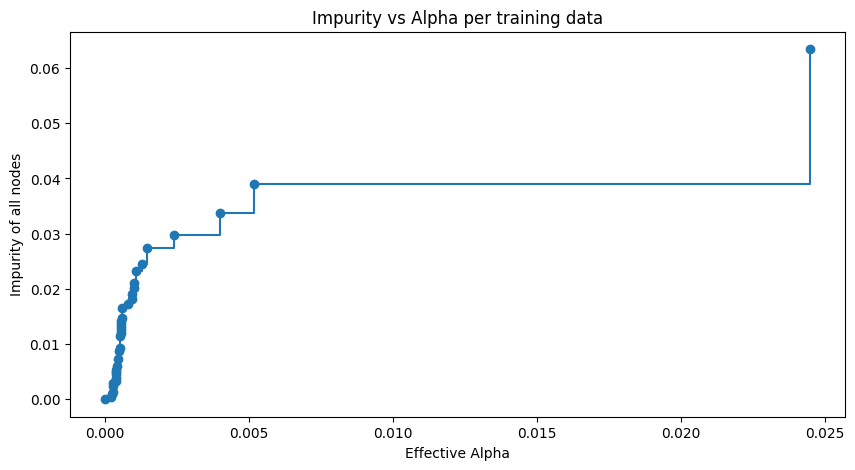

In [260]:
# Review the ccp_alphas and impurities relationship for training data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Impurity of all nodes")
ax.set_title("Impurity vs Alpha per training data")

In [261]:
#Get a list of decision tree models based on available ccp_alpha values and trained with training data
dtrees_alphas = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    dt.fit(X_train, y_train)
    dtrees_alphas.append(dt)

In [262]:
#Get the training scores for each decision tree model
f1_training_scores = [] 

for dt in dtrees_alphas:
    pred_train = dt.predict(X_train)
    f1 = f1_score(y_train, pred_train)
    f1_training_scores.append(f1)

In [263]:
#Get the test score for each decision tree model
f1_test_scores = [] 
for dt in dtrees_alphas:
    pred_test = dt.predict(X_test)
    f1 = f1_score(y_test, pred_test)
    f1_test_scores.append(f1)

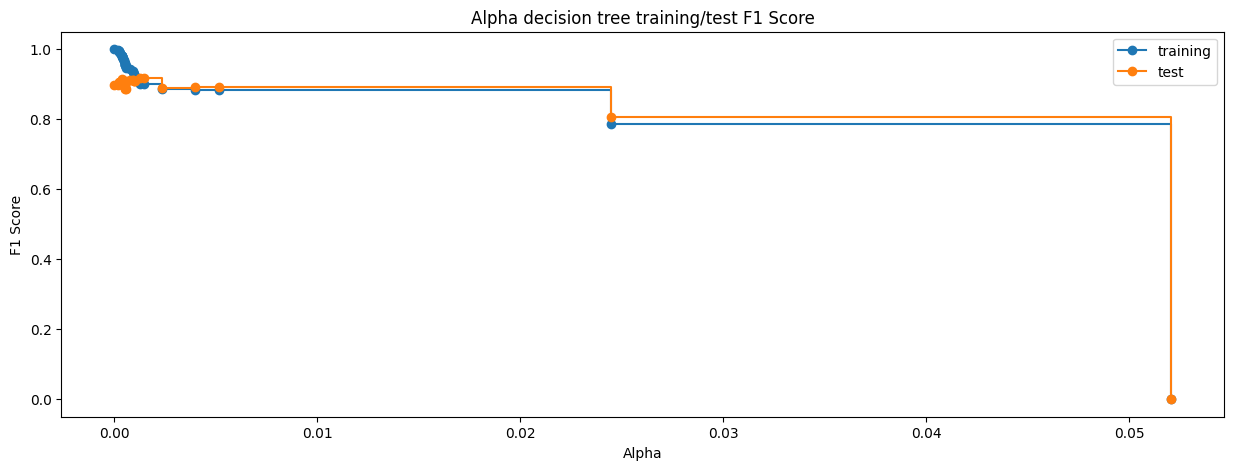

In [264]:
#Let's plot the f1 scores for training and test data and see where they converge
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  
ax.set_ylabel("F1 Score")  
ax.set_title("Alpha decision tree training/test F1 Score")
ax.plot(ccp_alphas, f1_training_scores, marker="o", label="training", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend(); 

In [265]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(f1_test_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = dtrees_alphas[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.001261913404200155, random_state=42)


Let's evalaute the post pruned model performance

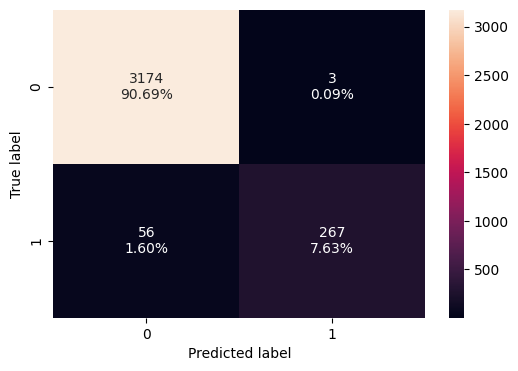

In [266]:
plot_confusion_matrix(dtree3, X_train, y_train)

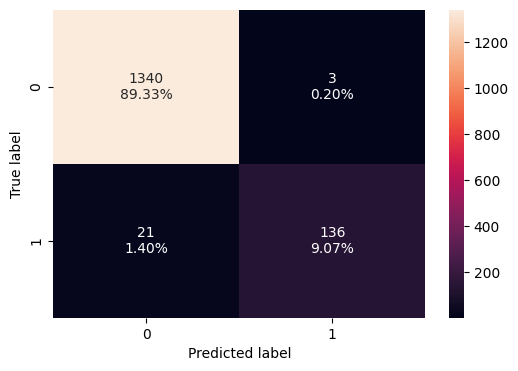

In [267]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [268]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.983143,0.826625,0.988889,0.900506


In [282]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.984,0.866242,0.978417,0.918919


Again, training and test F1 score are very close to each other.  This time the test scored better than trainning meaing post pruning works better.  The F1 score is no worst then pre-prunng method. 

## Model Performance Comparison and Final Model Selection

In [305]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Default",
    "Pre-Pruning",
    "Post-Pruning",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Default,Pre-Pruning,Post-Pruning
Accuracy,1.0,0.984286,0.983143
Recall,1.0,0.854489,0.826625
Precision,1.0,0.971831,0.988889
F1,1.0,0.909390,0.900506


In [304]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Default",
    "Pre-Pruning",
    "Post-Pruning",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Default,Pre-Pruning,Post-Pruning
Accuracy,0.979333,0.981333,0.984000
Recall,0.878981,0.866242,0.866242
Precision,0.920000,0.951049,0.978417
F1,0.899023,0.906667,0.918919


Let's look at the output of the decision tree output and features used to decide on which model to use

In [272]:
#Let's see the pre-pruned output and split report
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=trained_features,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [30.00, 1.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [27.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- weights: [85.00, 31.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- weights: [2.00, 10.00] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [1.00, 0.00] class: 0
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|  

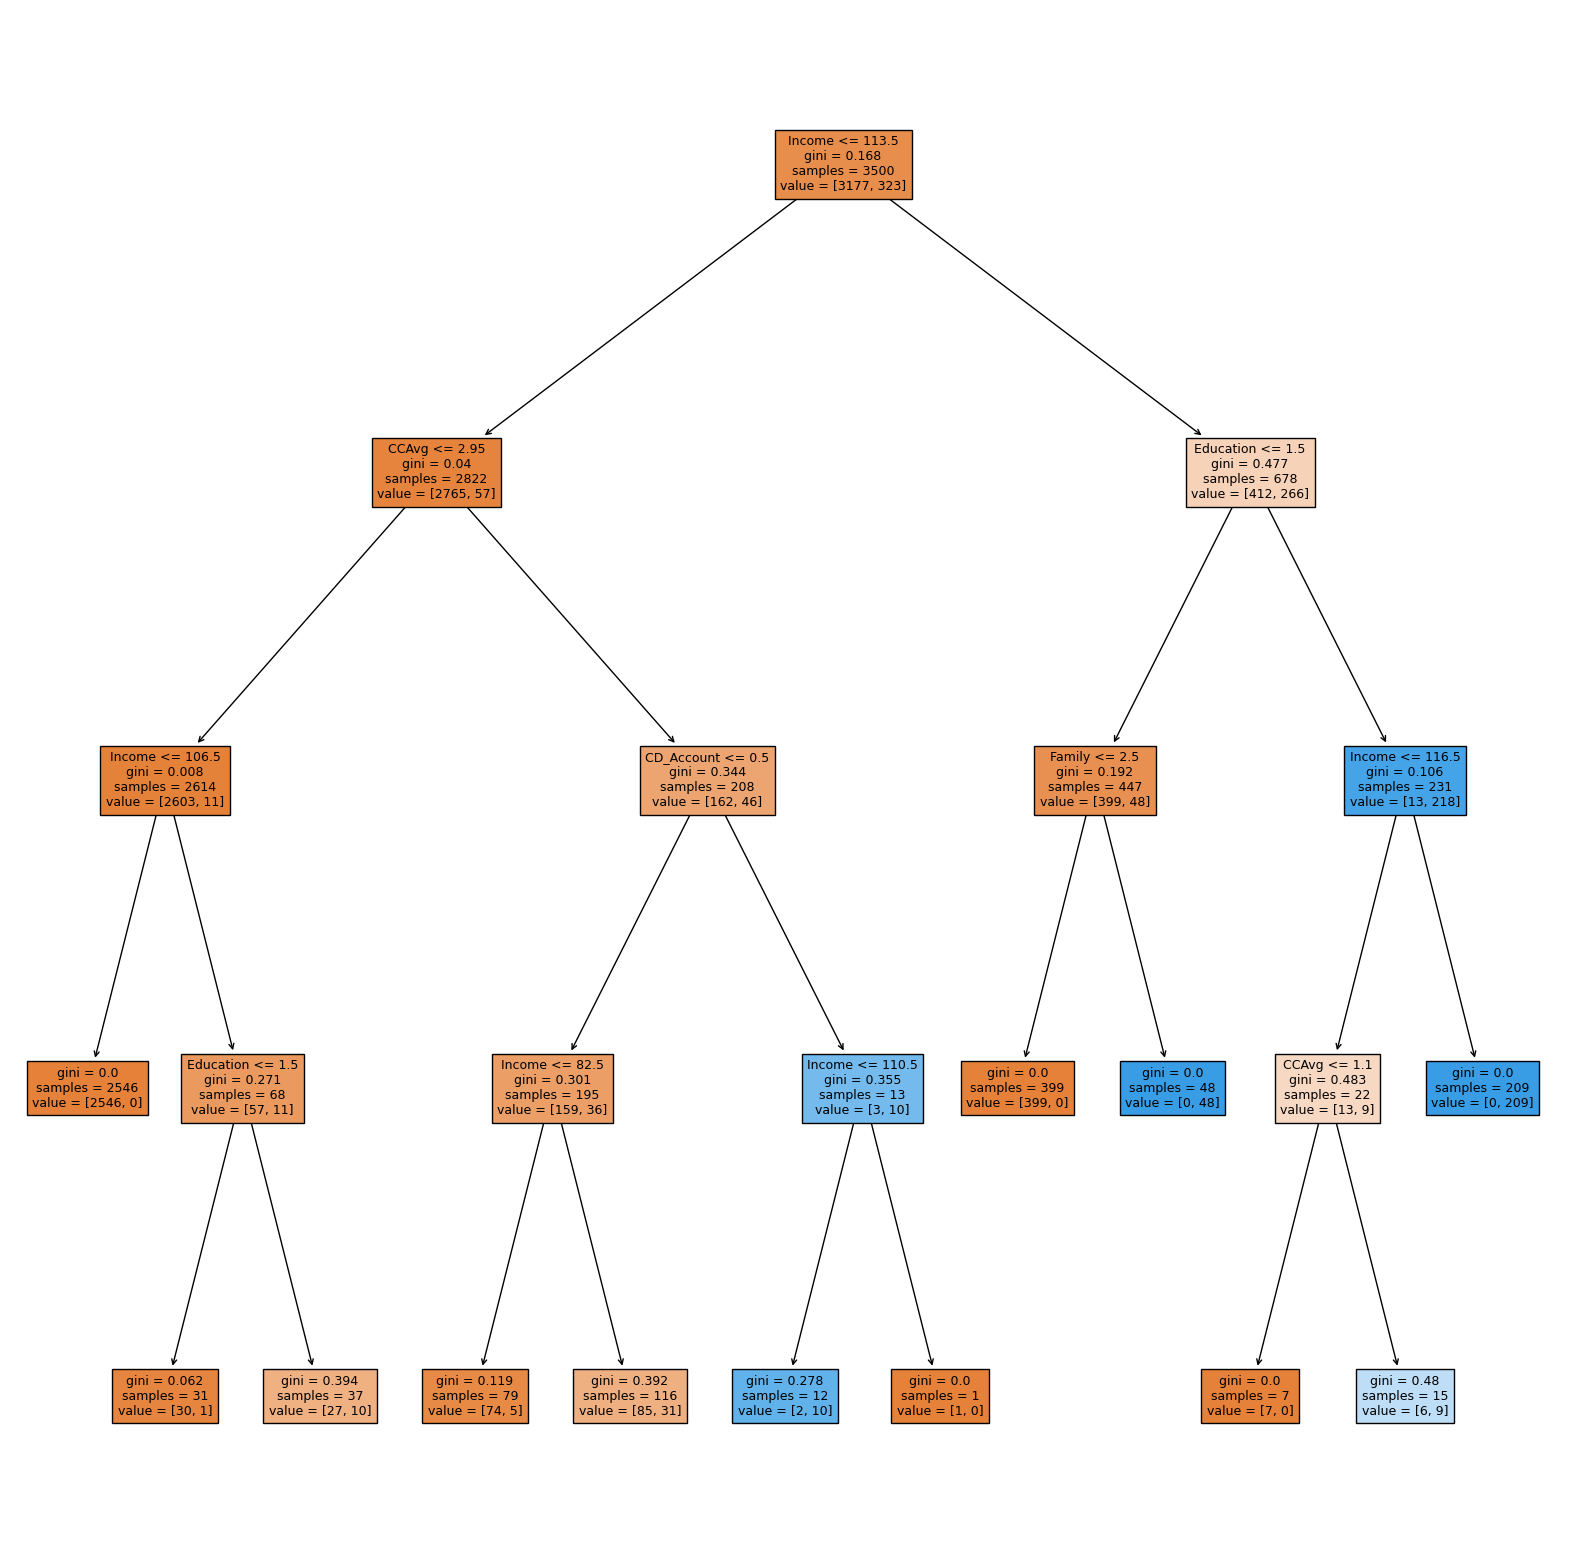

In [273]:
#Let's see the pre-pruned split visually
plt.figure(figsize=(20, 20))
tree.plot_tree(dtree2, feature_names=X.columns, 
    filled=True,
    fontsize=9,                     
    node_ids=False,                 # do not show the ID of each node
    class_names=None )
plt.show()

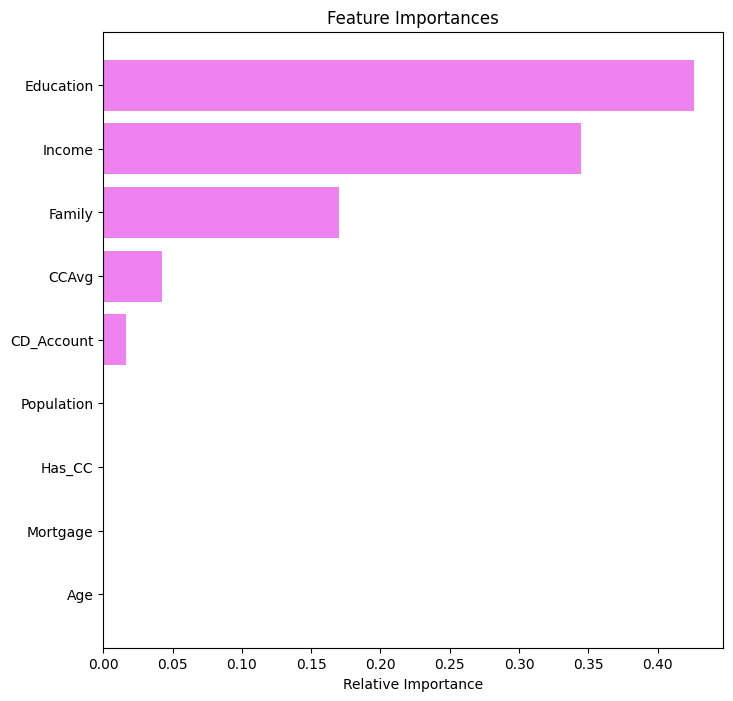

In [274]:
#importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [trained_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Let's see the Post Pruned Tree and how splits are done and features used

In [275]:
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=trained_features,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2603.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |--- weights: [33.00, 25.00] class: 0
|   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |--- weights: [52.00, 6.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 9.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 209.00] class: 1



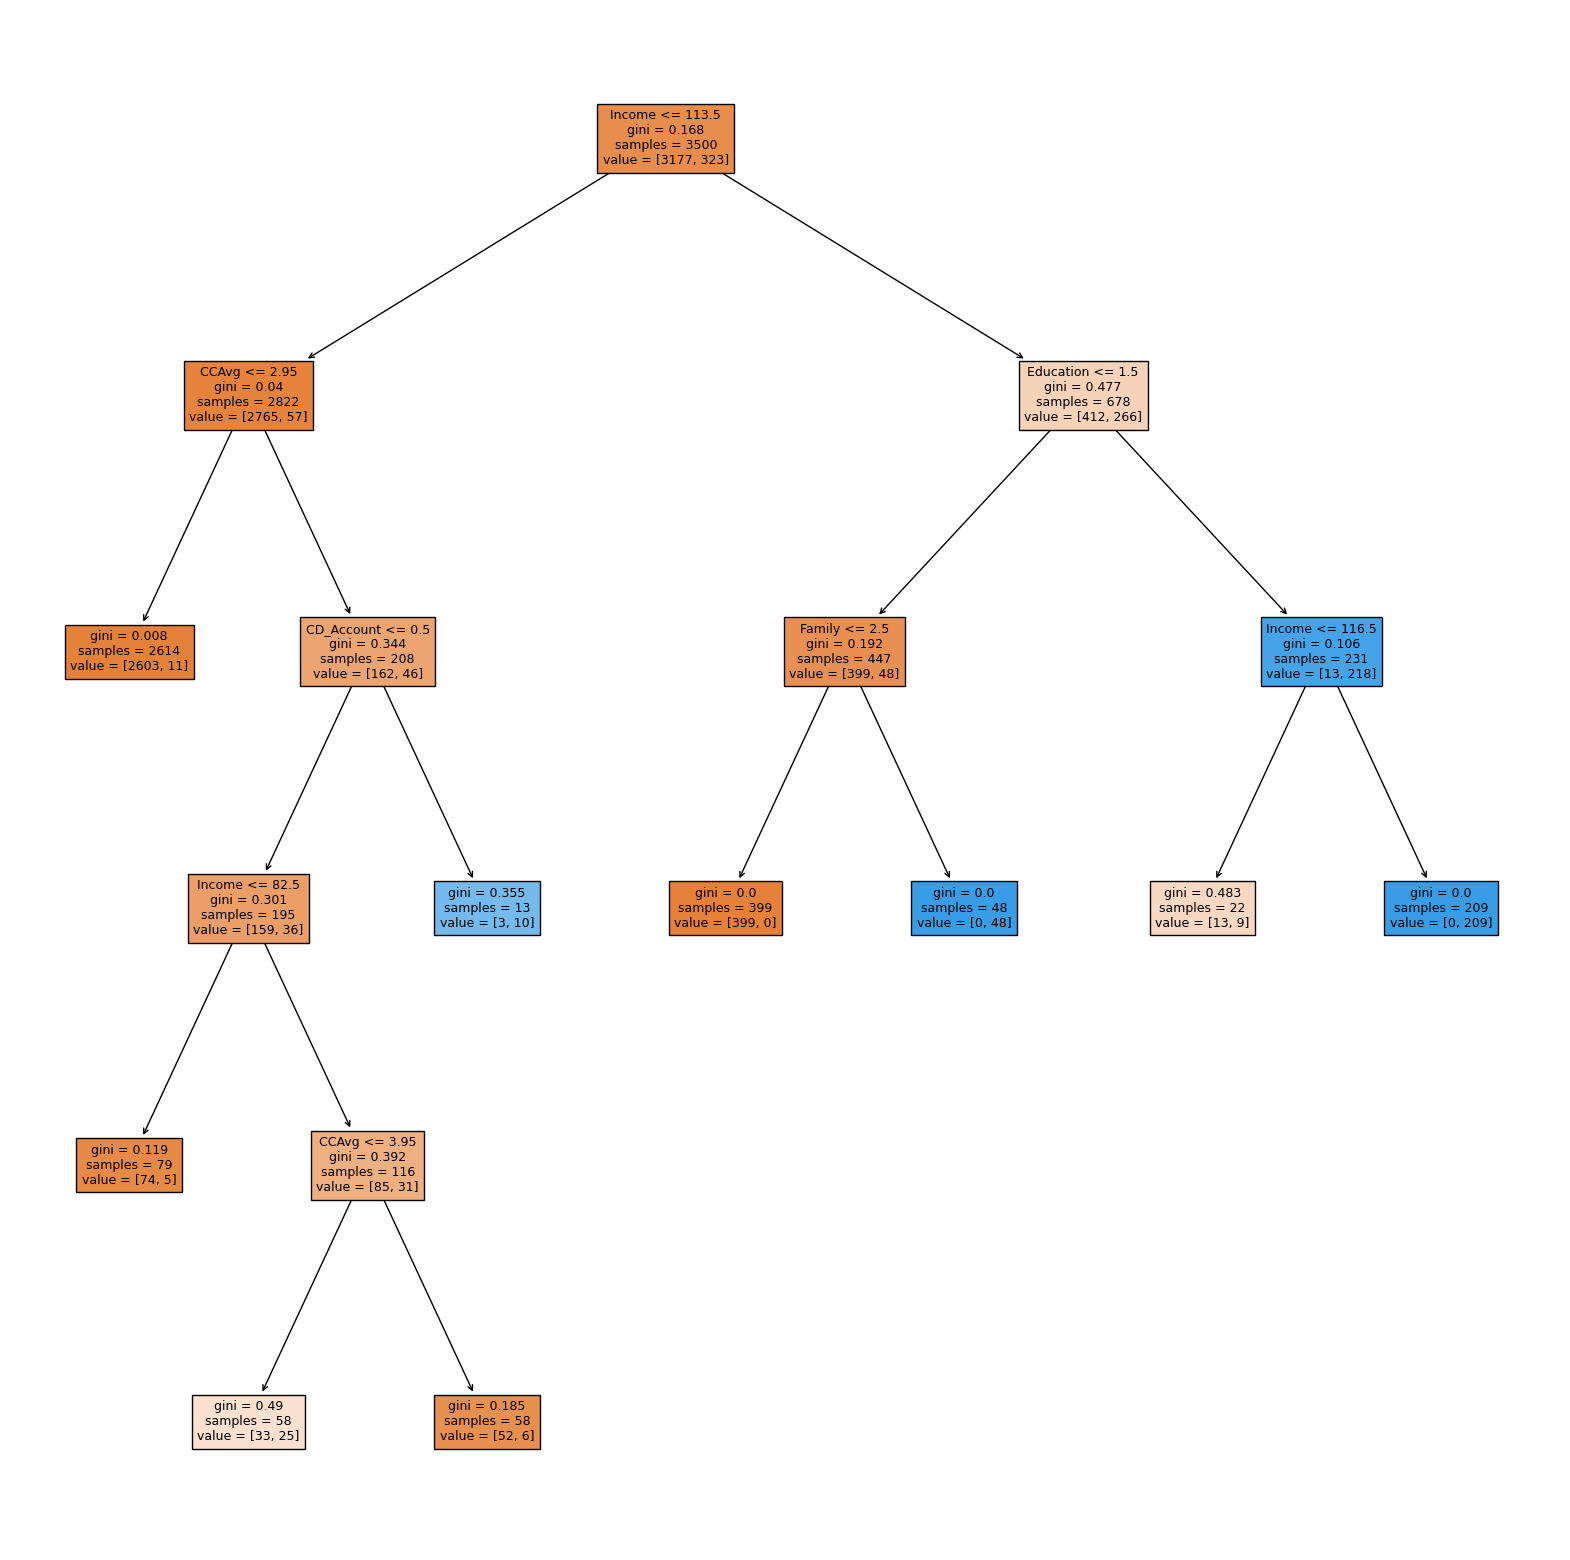

In [276]:
#Let's see the pre-pruned split visually
plt.figure(figsize=(20, 20))
tree.plot_tree(dtree3, feature_names=X.columns, 
    filled=True,
    fontsize=9,                     
    node_ids=False,                 # do not show the ID of each node
    class_names=None )
plt.show()

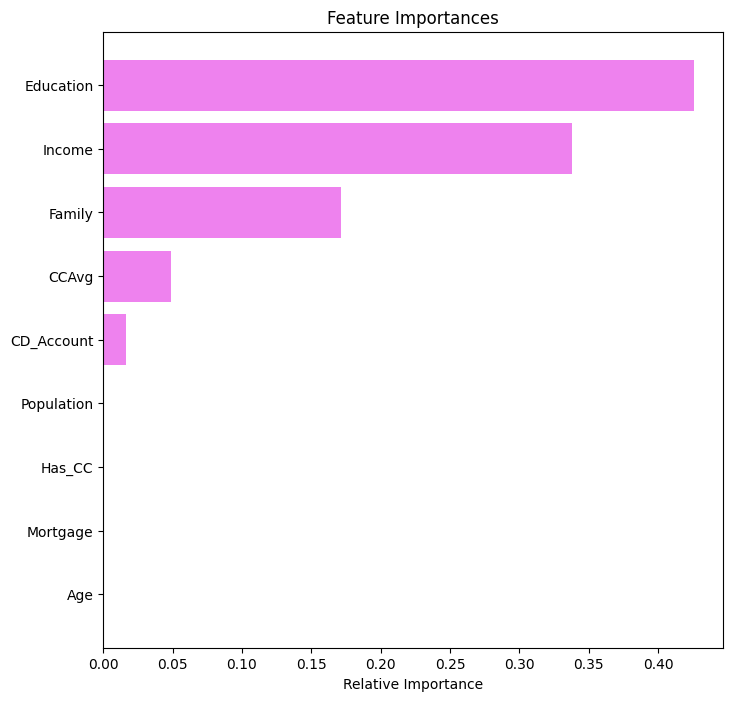

In [277]:
#importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [trained_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [297]:
%%time
loan = X_test.iloc[:1, :]

# making a prediction
loan_acceptance = dtree2.predict(loan)

print(loan_acceptance)

[0]
CPU times: user 1.5 ms, sys: 119 μs, total: 1.62 ms
Wall time: 1.57 ms


In [301]:
%%time
loan = X_test.iloc[:1, :]

# making a prediction
loan_acceptance = dtree3.predict(loan)

print(loan_acceptance)

[0]
CPU times: user 2 ms, sys: 291 μs, total: 2.29 ms
Wall time: 2.07 ms


In [302]:
# making a prediction
loan_acceptance_likelihood = dtree2.predict_proba(loan)

print(loan_acceptance_likelihood[0, 1])

0.0


In [303]:
# making a prediction
loan_acceptance_likelihood = dtree3.predict_proba(loan)

print(loan_acceptance_likelihood[0, 1])

0.004208110175975516


### Because both models are using the same features, and the Post Prune model has higher Test F1 score(0.918919 vs 0.906667) and almost identical training F1 score (0.900506 for post pruning and 0.909390 for pre-pruning), I recommend to use the Post-Pruning model.  This is also supported by the fact that both model performed equally well.  Finally the Post-pruning moduel requires less split to reach the node level: 2 vs 3 splits.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on the analysis, we know following feaatures drive the likelihood of customer will take personal loans(in order of importance):</br>
<ul>
<li>Education
<li>Income
<li>Family Size
<li>Existing Credit Card Monthly Spend
<li>If customer already had an CD deposit with the bank
</ul>
</br>The recommendations are:</br>
<ul>
<li>The easist thing that bank can do is when customer is openning a CD account, providing them with opporunities to fill out a personal loan. The successful rate is 46%.  This can be done by simply asking the clerk to present loan offers to the customer while using Post-Pruning model to further profile customer.  We can direct the clerk's effort based on the model classification result.  For example, continue to assit the customer for loan offer if customer fit well into the model.
</br>
<li>Bank should also obtain on customer's education, income and CCredit spending information by purchase these data regularly.  Use these data to run through the Post-Purning model to classify customer into ideal target group with likelihood of accepting Personal Loan.  Then actively reach out to these customers for application.
</br>
<li>When targeting customers based on education: people with more more education is more likely to to accept personal loans.
</br>
<li>People with average monthly Credit Card spending of $2600 to 5400 are likely to accept personal loan
</br>
<li>Family with more than 2 family members are more likely to accpet personal loan offers
</br>
<li>People with higher income (>113K) are more likely to accept personal loan offer
</br>
<li>Overall the recommendation is for the bank to target families living in metro cities with higher than average income with advanced education.  They shoud also target family with average credit card spending of more than $2600.
</br>
<li> From geo-location targeting point of view, if mailing flyer is used, then it is best to target major cities and along coastal areas with high population density
</br>
</ul>



___